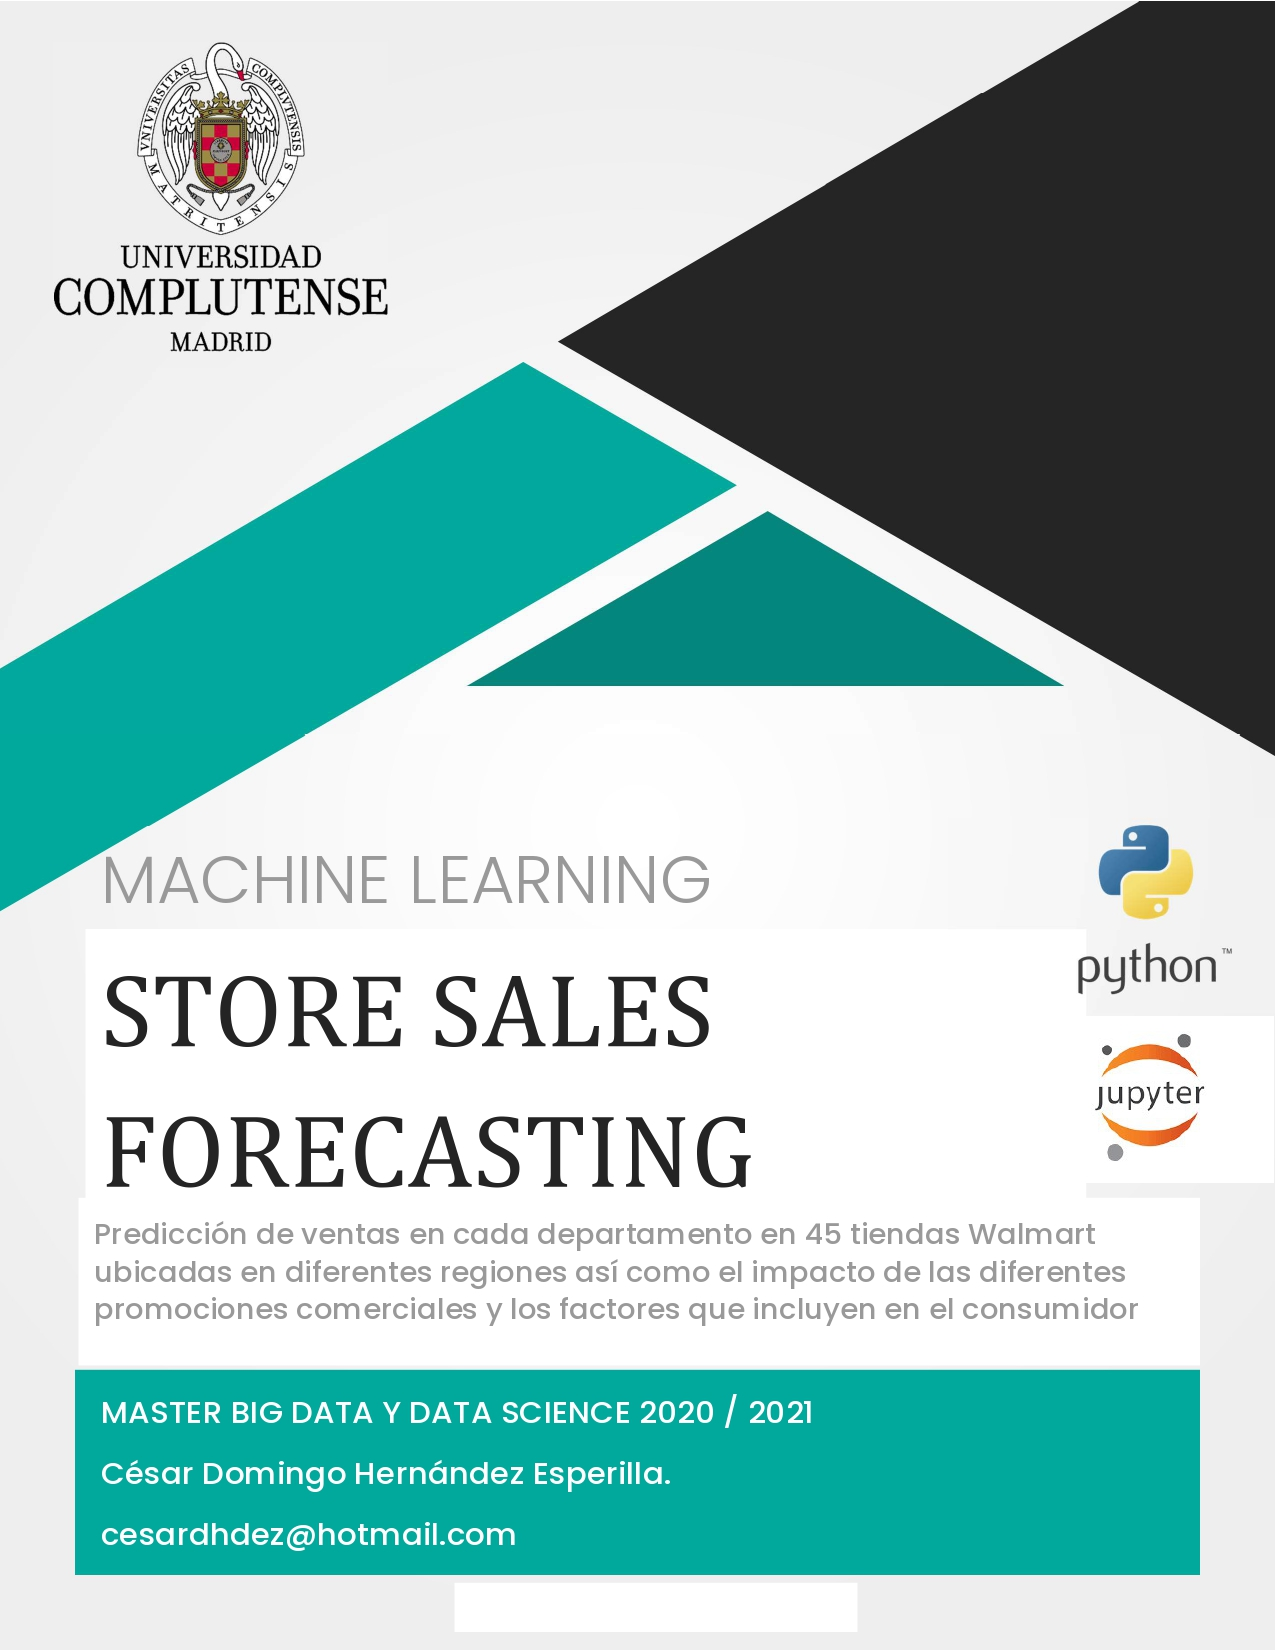

# 1. Introducción

Las cadenas de Retail siempre han trabajado en un entorno competitivo con márgenes cada vez más ajustados. El correcto uso de los datos puede marcar la diferencia, por tanto predecir las ventas así como conocer la eficacia en los diferentes  departamentos, las campañas comerciales y el comportamiento del consumidor puede marcar la diferencia y nos ayudara a ser comercialmente más eficientes, tener un correcto stock de los productos, ajustar la plantilla de trabajo entre otros. 
El presente trabajo permite facilitar y automatizar esta tarea con el fin de facilitar la toma de decisiones.
Para realizar este trabajo se han utilizado datos históricos de ventas para 45 tiendas Walmart ubicadas en diferentes regiones. Cada tienda contiene varios departamentos y se tiene la tarea de predecir las ventas de todo el departamento para cada tienda.
Además, Walmart organiza varios eventos promocionales de rebajas durante todo el año. Estas rebajas preceden a los feriados importantes, los cuatro más grandes de los cuales son el Super Bowl, el Labor Day, Thanksgiving y Christmas. Las semanas que incluyen estos días festivos se ponderan cinco veces más en la evaluación que las semanas que no son festivos. Parte del desafío que presenta esta competencia es modelar los efectos de las rebajas en estas semanas de vacaciones en ausencia de datos históricos completos / ideales.
De forma adicional se estudia el comportamiento de las ventas en las tiendas según su formato y conocer cuales son los departamentos que mas contribuyen a la cifra semanal. Se estudiara la estacionalidad de las ventas y los resultados de los cinco tipos de rebajas a lo largo del año para conocer como de efectivas ha sido tanto de forma individual y conjunta.
Analizaremos el comportamiento del consumidor en función de si la semana es festiva o no, la temperatura ambiente, el precio del carburante, el IPC así como la tasa de desempleo.



# 1. Abstract


Retail chains have always worked in a competitive environment with increasingly tight margins. The correct use of data can make a difference, therefore predicting sales as well as knowing the effectiveness in different departments, commercial campaigns and consumer behavior can make a difference and help us to be more commercially efficient, have a correct Stock of products, adjust the workforce among others.
The present work allows to facilitate and automate this task in order to facilitate decision-making.
To carry out this work, historical sales data have been used for 45 Walmart stores located in different regions. Each store contains several departments and you are tasked with predicting the sales of the entire department for each store.
In addition, Walmart organizes several promotional sales events throughout the year. These sales precede major holidays, the four biggest of which are the Super Bowl, Labor Day, Thanksgiving and Christmas. The weeks that include these holidays are weighted five times more in the evaluation than the weeks that are not holidays. Part of the challenge this competition presents is modeling the effects of sales on these vacation weeks in the absence of complete / ideal historical data.
Additionally, the behavior of sales in stores is studied according to their format and to know which are the departments that contribute the most to the weekly figure. The seasonality of sales and the results of the five types of sales throughout the year will be studied to know how effective it has been both individually and jointly.
We will analyze consumer behavior depending on whether the week is a holiday or not, the ambient temperature, the price of fuel, the CPI as well as the unemployment rate.


# 2. Carga de datos

In [1]:
import pandas as pd
train_df = pd.read_csv("train_df.csv")
test_df = pd.read_csv("test_df.csv")
data_train = pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")
stores = pd.read_csv("stores.csv")
sampleSubmission = pd.read_csv("sampleSubmission.csv")

In [2]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# 3.  Exploratory Data Analysis

## 3.1 Análisis de formatos de tiendas y ventas

### 3.1.2 Boxplot Superficie / Tipo de tienda
Para los tres formatos de tienda, el modelo A es el mayor tamaño. El formato B es el modelo que presenta un rango de superficie mayor. finalmente, el modelo de tienda C posee un formato que con una superficie similar a todas las tiendas siendo las tiendas de tipo C a un formato de tienda de conveniencia.

Text(0.5, 1.0, 'Boxplot Superficie / Tipo de tienda')

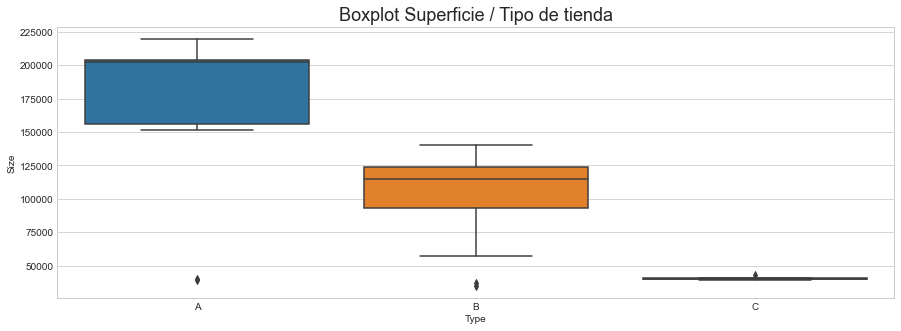

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
plt.figure(figsize=(15, 5))
sns.boxplot(x='Type', y='Size', data=store_type);
plt.title("Boxplot Superficie / Tipo de tienda", fontsize=18)

### 3.1.3 Gráfico de barras : Superficie de todas las tiendas

Complementando al boxplot anterior, en la siguiente imagen se observa un primer bloque de 10 tiendas con superficie similar, esto es debido a los outliers del formato B que se solapan con la superficie del formato A.

Posteriormente se observa un grupo intermedio de tiendas con una superficie bastante variable que corresponden al formato B y A.

En el último tramo existen tiendas con una superficie superior a 200,000 que pertenecen solamente al grupo A.

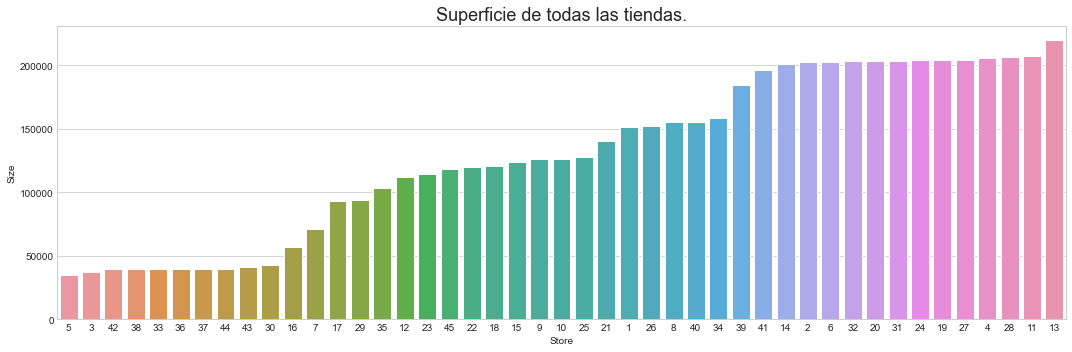

In [50]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Superficie de todas las tiendas.',fontsize=18)
plt.tight_layout();

### 3.1.4 Grafico ventas semanales por formato de tienda y departamento

#### Gráfico 1: Ventas semanales / Tipo de tienda

Observamos que el modelo C posee cifras de ventas semanales estables a lo largo del año y no parece que le afecte el comportamiento estacionario de las ventas. En el lado contrario, los formatos A y B si parecen estar sujetos a las fluctuaciones en las ventas como la Cuesta de Enero, la Navidad y el Dia de Acción de Gracias entre otros.

#### Gráfico 2: Ventas semanales / Departamento

Posteriormente comprobamos que no todos los departamentos contribuyen de la misma manera en las ventas semanales así pues los departamentos 92,95,38,40,72 y 65 serían los que más aportan frente a 39,43,45,47,51,54 y 78 en los que su cifra es prácticamente nula.

Text(0.5, 1.0, 'Ventas semanales / Departamento')

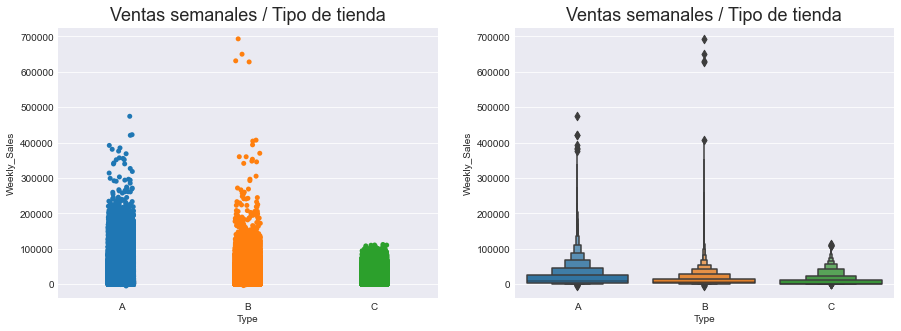

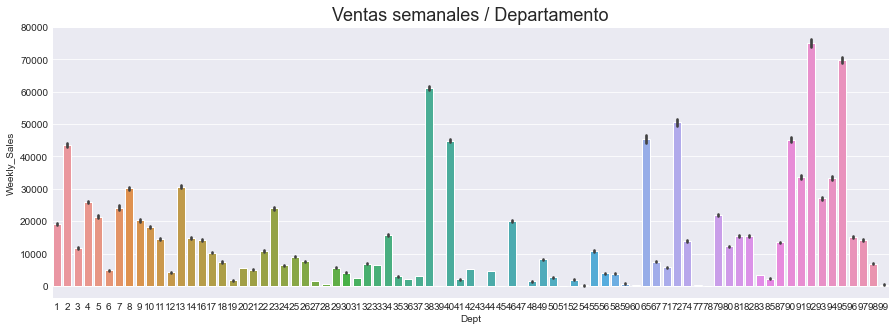

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Ventas semanales / Tipo de tienda", fontsize=18)
sns.stripplot(y=train_df['Weekly_Sales'],x=train_df['Type'])
plt.subplot(1,2,2)
sns.boxenplot(y=train_df['Weekly_Sales'],x=train_df['Type']);
plt.title("Ventas semanales / Tipo de tienda", fontsize=18)


plt.figure (figsize = (15,5))
sns.set_style('darkgrid')
sns.barplot ( data = train_df, x = 'Dept', y = 'Weekly_Sales');
plt.title("Ventas semanales / Departamento", fontsize=18)

### 3.1.5 Línea temporal con el promedio de las ventas semanales & grafico de barras complementario


#### Gráfico 1 : Promedio ventas semanales por año
Se observa durante las cuatro primeras semanas de enero el periodo de ventas más bajo del año, con una fuerte subida en febrero donde se mantendrían las cifras en unos valores relativamente constantes hasta la semana 43. Entre la semana 44 hasta las 49 se producen unas ventas muy bajas a excepción de la semana 47 donde se produce una fuerte subida en las ventas.

La semana 51 comprende las fechas entre el 20 y el 26 de diciembre estando por tanto en Navidades, es comprensible que se produzcan en esa semana las mayores ventas del año.

Se comprueba que las ventas tienen un componente estacionario a lo largo de los años al observarse que repite el mismo patrón en 2010, 2011 y 2012.

#### Gráfico 2 : Promedio de las ventas semanales de Walmart a traves de una linea de tiempo
Comprobamos que las ventas tienen un componente estacionario a lo largo de los años al observarse que repite el mismo patrón en 2010, 2011 y 2012 con una fuerte subida de las evntas en las semanas 47 y 51.

#### Gráfico 3 : Boxplot Ventas semanales / Semana
En las semanas mencionadas existe un rango mas amplio debido una mayor dispersión en las ventas ya que no todas las tiendas se comportan igual en este periodo. Además, existe una distribución asimétrica positiva de las cifras de ventas en todas las semanas indicando que los valores que están por encima de la mediana están mas dispersos.

Text(0.5, 1.0, 'Boxplot Ventas semanales / Semana')

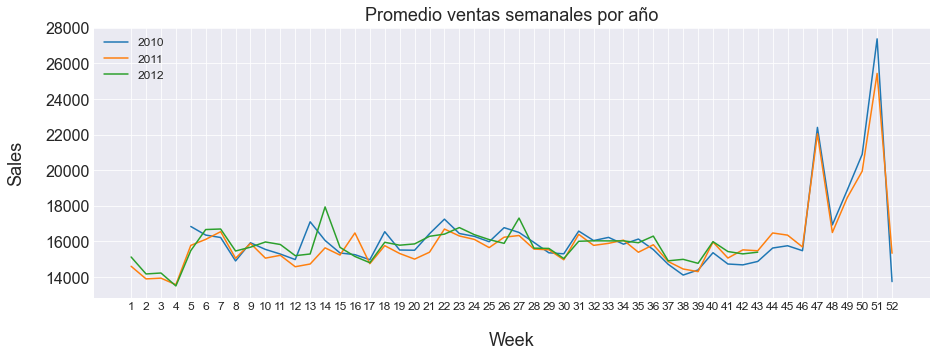

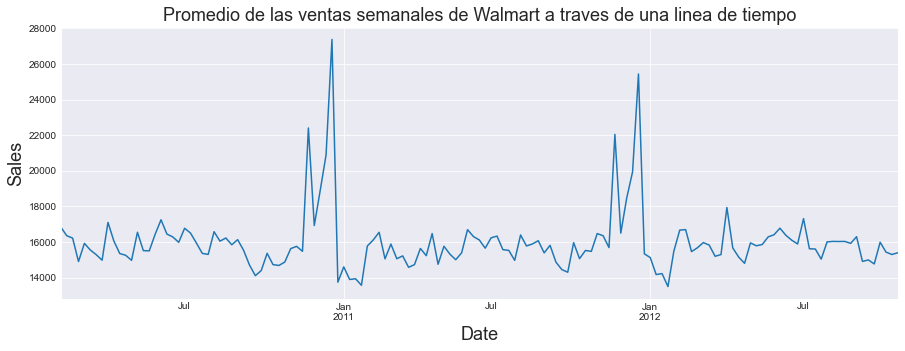

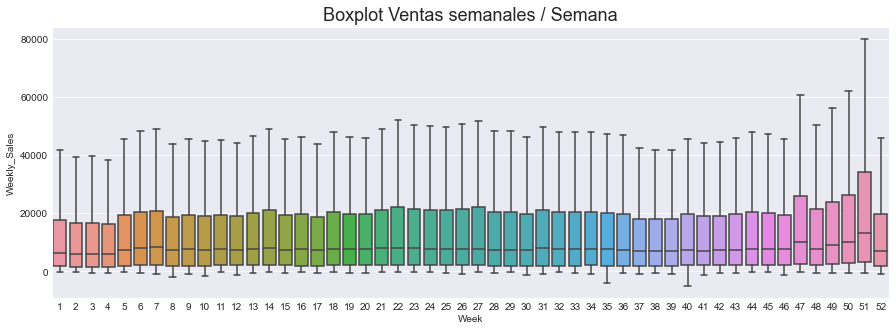

In [55]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

###
df_weeks = train_df.groupby('Week').sum()

weekly_sales_2010 = train_df[train_df.Year==2010].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2011 = train_df[train_df.Year==2011].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2012 = train_df[train_df.Year==2012].groupby('Week')['Weekly_Sales'].mean()


plt.figure(figsize=(15,5))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=12)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=18, labelpad=20)
plt.ylabel('Sales', fontsize=18, labelpad=20)

plt.title("Promedio ventas semanales por año", fontsize=18)
plt.legend(['2010', '2011', '2012'], fontsize=12);
###
plt.figure(figsize=(15,5))
train_df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Promedio de las ventas semanales de Walmart a traves de una linea de tiempo', fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.xlabel('Date', fontsize=18);
####
data = pd.concat([train_df['Week'], train_df['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(15, 5))
fig = sns.boxplot(x='Week', y="Weekly_Sales", data=data, showfliers=False)
plt.title("Boxplot Ventas semanales / Semana", fontsize=18)

### 3.1.6 Promedio de ventas mensuales por formato de tienda

El mayor promedio de ventas mensuales se produce en el formato A debido a que existen más unidades y su formato es mayor.
El formato B posee un comportamiento similar al A con una curva en el crecimiento de las ventas a partir del mes 10.
Para el formato C se aprecia un comportamiento lineal con una leve caída en ventas el mes 12, esto podría ser debido a que las tiendas de menor tamaño ofrecen un servicio de tiendas de proximidad donde abastece de los productos de uso diario y el mes de diciembre al aumentarse las ventas en los formatos A y B, cubre las necesidades de las familias no siendo necesaria la compra en el formato C. Se observa por tanto una correlación negativa entre los formatos A y C, así como B y C. (*)

(*) Correlaciones disponibles en:
5.1.1 Correlaciones entre promedio de ventas mensuales y formatos

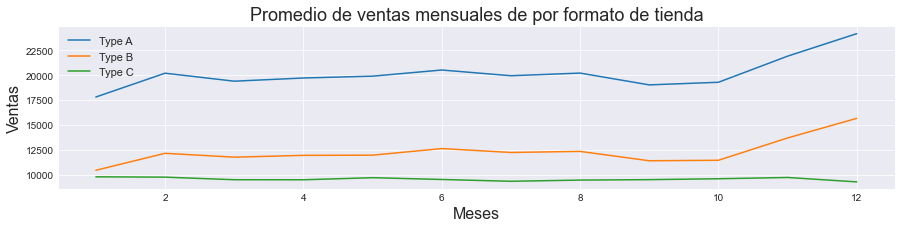

In [29]:
plt.figure(figsize=(15,3))
train_df[train_df['Type']=='A'].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Type']=='B'].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Type']=='C'].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Promedio de ventas mensuales de por formato de tienda', fontsize=18)
plt.legend(['Type A', 'Type B', 'Type C'], loc='best', fontsize=11)
plt.ylabel('Ventas', fontsize=16)
plt.xlabel('Meses', fontsize=16);

### 3.1.7 Promedio de ventas mensuales por año.

Se observa un comportamiento similar en casi todos los meses para los años 2010,2011 y 2012. Las mayores ventas se producen en los meses 11 y 12 y tras las Navidades las ventas llegan a sus valores mínimos.

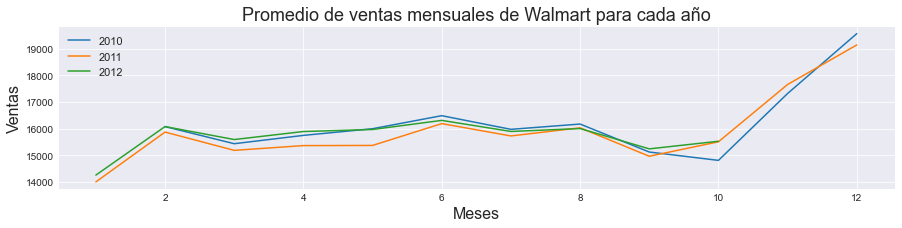

In [30]:
plt.figure(figsize=(15,3))
train_df[train_df['Year']==2010].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Year']==2011].groupby('Month').mean()['Weekly_Sales'].plot()
train_df[train_df['Year']==2012].groupby('Month').mean()['Weekly_Sales'].plot()
plt.title('Promedio de ventas mensuales de Walmart para cada año', fontsize=18)
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=11)
plt.ylabel('Ventas', fontsize=16)
plt.xlabel('Meses', fontsize=16);

## 3.2 Análisis de los resultados de las Rebajas

### 3.2.1 Ventas vs MarkDown1

Analizando el grafico resultante se observa una fuerte subida en las ventas en la semana 5 y en Rebajas1 (MarkDown1).
Existe una fuerte correlación del 99% entre las cinco primeras semanas del año y la estrategia de ventas con las rebajas Markdown1, por tanto, se supone que pudiera ser una estrategia comercial enfocada en superar la cuesta de enero.(*)

(*) Correlaciones disponibles en:
5.1.2 Correlacion entre Markdow1 y las cinco primeras semanas del año


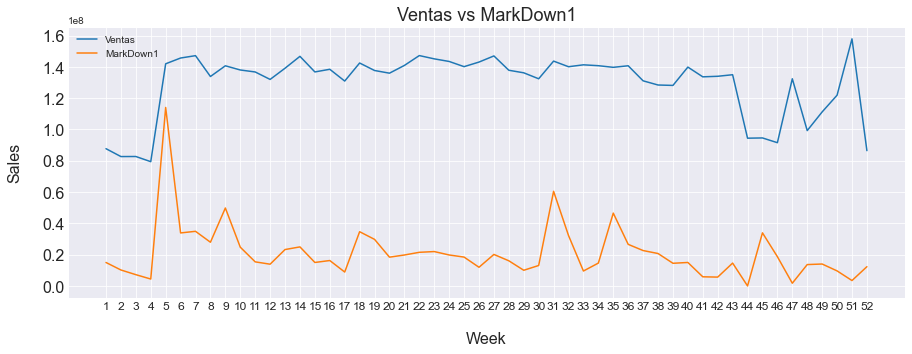

In [32]:
Ventas = df_weeks.groupby('Week')['Weekly_Sales'].mean()
MK1 = df_weeks.groupby('Week')['MarkDown1'].mean()


plt.figure(figsize=(15,5))
plt.plot(Ventas.index, Ventas.values)
plt.plot(MK1.index, MK1.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=12)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=16, labelpad=20)

plt.title("Ventas vs MarkDown1", fontsize=18)
plt.legend(['Ventas', 'MarkDown1'], fontsize=10);

#### 3.2.2 Ventas vs MarkDown2

Analizando el comportamiento de las Rebajas2 (Markdown2), se aprecia una estrategia para fechas especificas (semanas desde la 01 hasta la 08, semana 14, semana 45 y semana 52). La correlación es moderadamente negativa del -0.44. Por tanto, al aumentar las rebajas disminuyen las ventas, esto podría ser debido a que se trata de productos básicos donde las unidades vendidas son las mismas independientemente del descuento y el aplicar las rebajas existe menos facturación(*).

(*) Correlaciones disponibles en:
5.1.3 Correlacion entre las semanas de promocion Markdown2 y las ventas semanales

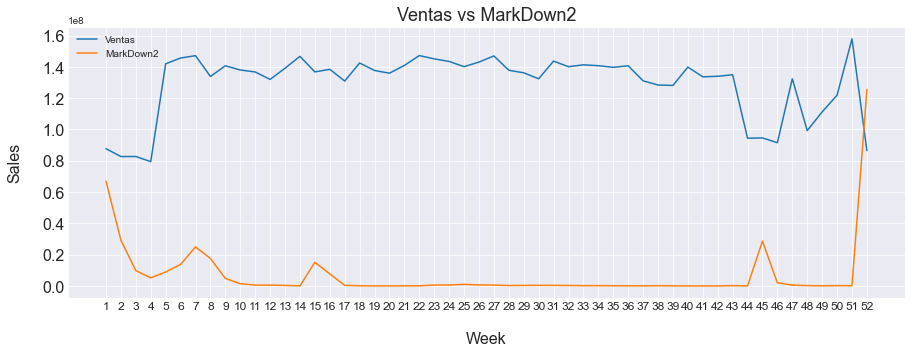

In [35]:
Ventas = df_weeks.groupby('Week')['Weekly_Sales'].mean()
MK2 = df_weeks.groupby('Week')['MarkDown2'].mean()


plt.figure(figsize=(15,5))
plt.plot(Ventas.index, Ventas.values)
plt.plot(MK2.index, MK2.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=12)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=16, labelpad=20)

plt.title("Ventas vs MarkDown2", fontsize=18)
plt.legend(['Ventas', 'MarkDown2'], fontsize=10);

#### 3.2.3 Ventas vs MarkDown3
Se trataría de una promoción específica para la semana 47 del día de Acción de Gracias (25 de noviembre) con una correlación positiva del 99% (*).

(*) Correlaciones disponibles en:
5.1.4 Correlacion entre las semanas de promocion Markdown3 y las ventas semanales

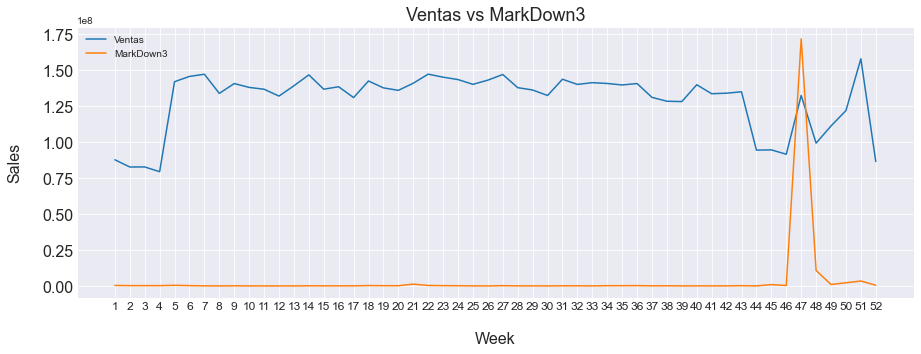

In [36]:
Ventas = df_weeks.groupby('Week')['Weekly_Sales'].mean()
MK3 = df_weeks.groupby('Week')['MarkDown3'].mean()


plt.figure(figsize=(15,5))
plt.plot(Ventas.index, Ventas.values)
plt.plot(MK3.index, MK3.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=12)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=16, labelpad=20)

plt.title("Ventas vs MarkDown3", fontsize=18)
plt.legend(['Ventas', 'MarkDown3'], fontsize=10);

#### 3.2.4 Ventas vs MarkDown4

Es una campaña enfocada en las cuatro primeras semanas del año, la semana 9 y la semana 31 con una fuerte correlación positiva del 82% (*).

(*) Correlaciones disponibles en:
5.1.5 Correlacion entre las semanas de promocion Markdown4 y las ventas semanales

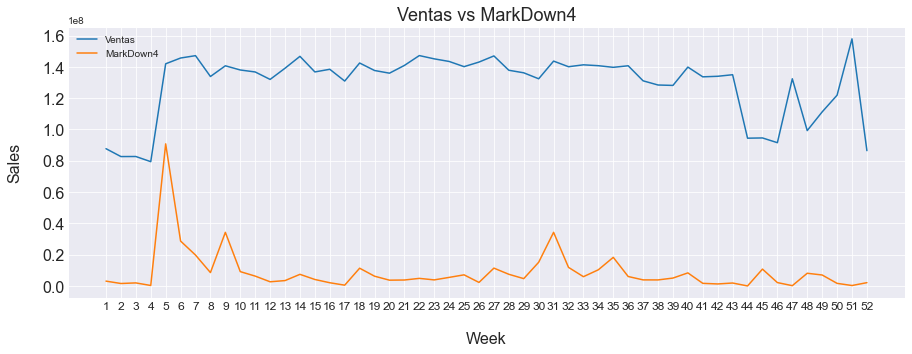

In [37]:
Ventas = df_weeks.groupby('Week')['Weekly_Sales'].mean()
MK4 = df_weeks.groupby('Week')['MarkDown4'].mean()


plt.figure(figsize=(15,5))
plt.plot(Ventas.index, Ventas.values)
plt.plot(MK4.index, MK4.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=12)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=16, labelpad=20)

plt.title("Ventas vs MarkDown4", fontsize=18)
plt.legend(['Ventas', 'MarkDown4'], fontsize=10);

#### 3.2.5 Ventas vs MarkDown5
Se produce un incremento del modelo de rebajas Markdown5 en la semana 48 siendo esta la semana posterior al Dia de Acción de Gracias y su finalidad podría ser eliminar los posibles excedentes de aquellos productos enfocados al 25 de noviembre o bien intentar evitar una caída en las ventas en la semana posterior a la festividad. La correlación es moderadamente negativa del -54% sugiriendo que se está eliminando stock en posibles productos perecederos.

(*) Correlaciones disponibles en:
5.1.6 Correlacion entre las semanas de promocion 46,47 y 48 Markdown5 y las ventas semanales

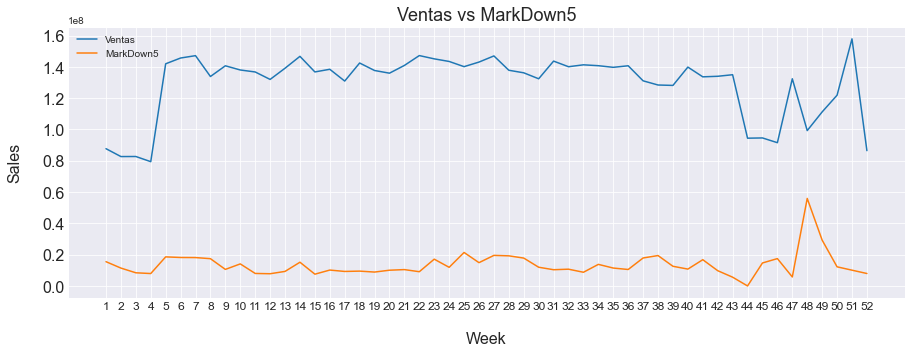

In [38]:
Ventas = df_weeks.groupby('Week')['Weekly_Sales'].mean()
MK5 = df_weeks.groupby('Week')['MarkDown5'].mean()


plt.figure(figsize=(15,5))
plt.plot(Ventas.index, Ventas.values)
plt.plot(MK5.index, MK5.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=12)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=16, labelpad=20)

plt.title("Ventas vs MarkDown5", fontsize=18)
plt.legend(['Ventas', 'MarkDown5'], fontsize=10);

#### 3.2.6 Ventas vs Total MarkDowns

El éxito en las diferentes campañas permite obtener una linealidad en las ventas a lo largo del año. No obstante, existen periodos concretos donde se produce un significativo descenso en las ventas, estos serían las cuatro primeras semanas del año y la semana anterior y posterior al Dia de Acción de Gracias.

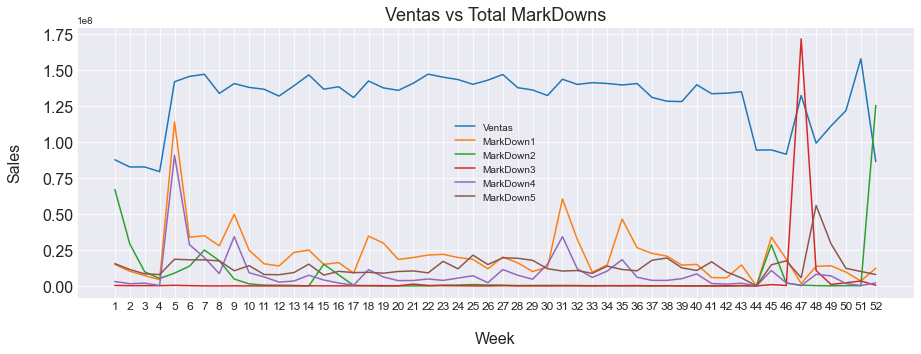

In [56]:
plt.figure(figsize=(15,5))
plt.plot(Ventas.index, Ventas.values)
plt.plot(MK1.index, MK1.values)
plt.plot(MK2.index, MK2.values)
plt.plot(MK3.index, MK3.values)
plt.plot(MK4.index, MK4.values)
plt.plot(MK5.index, MK5.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=12)
plt.yticks( fontsize=16)
plt.xlabel('Week', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=16, labelpad=20)

plt.title("Ventas vs Total MarkDowns", fontsize=18)
plt.legend(['Ventas', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], fontsize=10);

### 3.3 Análisis de diferentes variables

#### 3.3.1 Ventas vs Festivo

Cuando la semana es festiva se observa un aumento de las ventas semanales con bastante dispersión de valores frente a una semana regular.

Text(0.5, 1.0, 'Ventas vs Festivo')

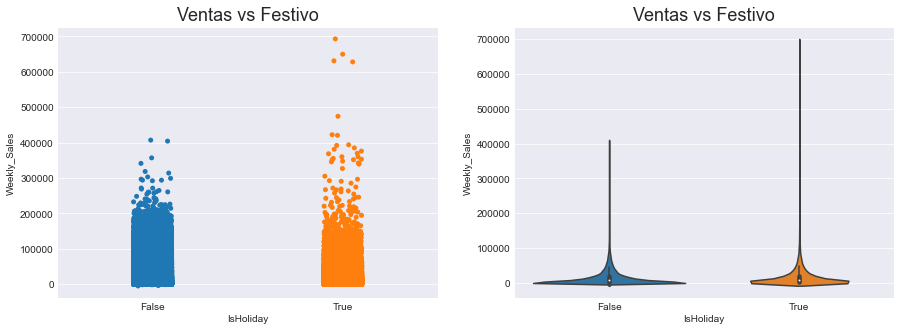

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Ventas vs Festivo", fontsize=18)
sns.stripplot(y=train_df['Weekly_Sales'],x=train_df['IsHoliday'])
plt.subplot(1,2,2)
sns.violinplot(y=train_df['Weekly_Sales'],x=train_df['IsHoliday']);
plt.title("Ventas vs Festivo", fontsize=18)

#### 3.3.2 Ventas vs Temperatura ambiente / Por formato de tienda

Se observa que la las ventas se mantienen estables independientemente de la temperatura exterior como norma general.

Text(0.5, 1.0, 'Ventas vs Temperatura ambiente / Por formato de tienda')

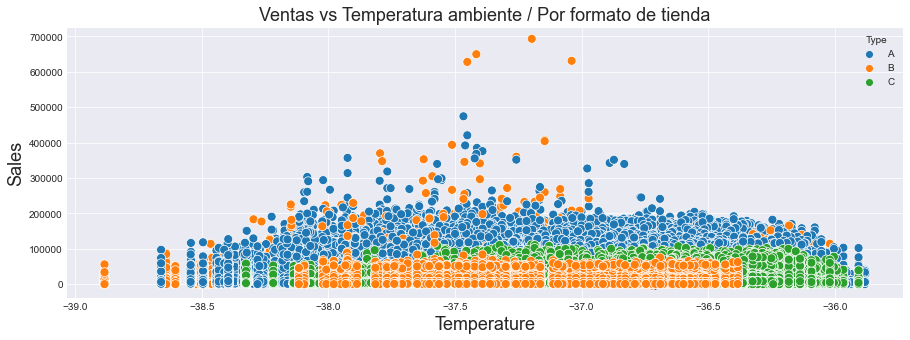

In [62]:
# Convertir la temperatura a grados centigrados para una mejor interpretacion.
#train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8)
#train_df['Temperature'] = train_df['Temperature'].apply(lambda x :  (x - 32) / 1.8 )
train_df['Temperature'] = (train_df['Temperature']-32.)/1.8
test_df['Temperature'] = (test_df['Temperature']-32.)/1.8

plt.figure(figsize=(15,5))
sns.scatterplot(x=train_df.Temperature, y=train_df.Weekly_Sales, hue=train_df.Type, s=80);

#plt.xticks( fontsize=16)
#plt.yticks( fontsize=16)
sns.set_style('darkgrid')
plt.xlabel('Temperature', fontsize=18)
plt.ylabel('Sales', fontsize=18);
plt.title("Ventas vs Temperatura ambiente / Por formato de tienda", fontsize=18)

#### 3.3.3 Ventas vs Precio carburante / Por formato de tienda

Se observa que las ventas se mantienen estables siempre que el galón de gasolina no supere los 4.25 USD

Text(0.5, 1.0, 'Ventas vs Precio carburante / Por formato de tienda')

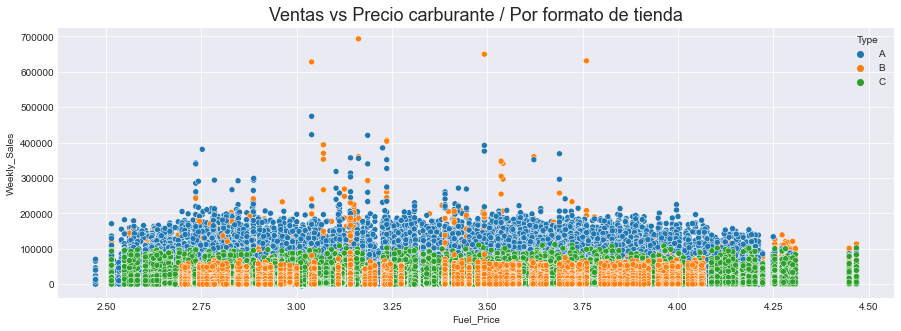

In [65]:
plt.figure (figsize = (15,5))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'Fuel_Price', y =  'Weekly_Sales', hue = 'Type' );
plt.title("Ventas vs Precio carburante / Por formato de tienda", fontsize=18)

##### 3.3.4 Ventas vs Desempleo / Por formato de tienda

El siguiente grafico nos muestra ventas semanales más elevadas cuando la tasa de desempleo se encuentra entre el 6% y 9%.
Valores superiores al 9% parecen afectar a los resultados.

Text(0.5, 1.0, 'Ventas vs Desempleo / Por formato de tienda')

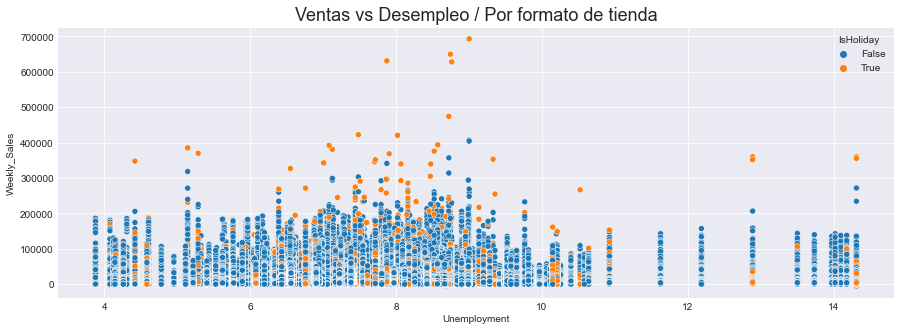

In [71]:
plt.figure (figsize = (15,5))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'Unemployment', y =  'Weekly_Sales', hue = 'IsHoliday' );
plt.title("Ventas vs Desempleo / Por formato de tienda", fontsize=18)

### 3.4 Matriz de correlación

#### 3.4.1 Matriz de correlación de las diferentes variables


Las rebajas Markdown1 y Markdown4 están sincronizadas para incrementar las ventas en el mes de enero y por eso se observa una correlación del 82%

Las rebajas Markdown3 tienen una lógica correlación positiva con IsHoliday por ser una promoción de Dia de Acción de Gracias.

El precio del combustible tiene una fuerte correlación positiva con el año, confirmando una subida gradual del precio de carburante a lo largo del tiempo.


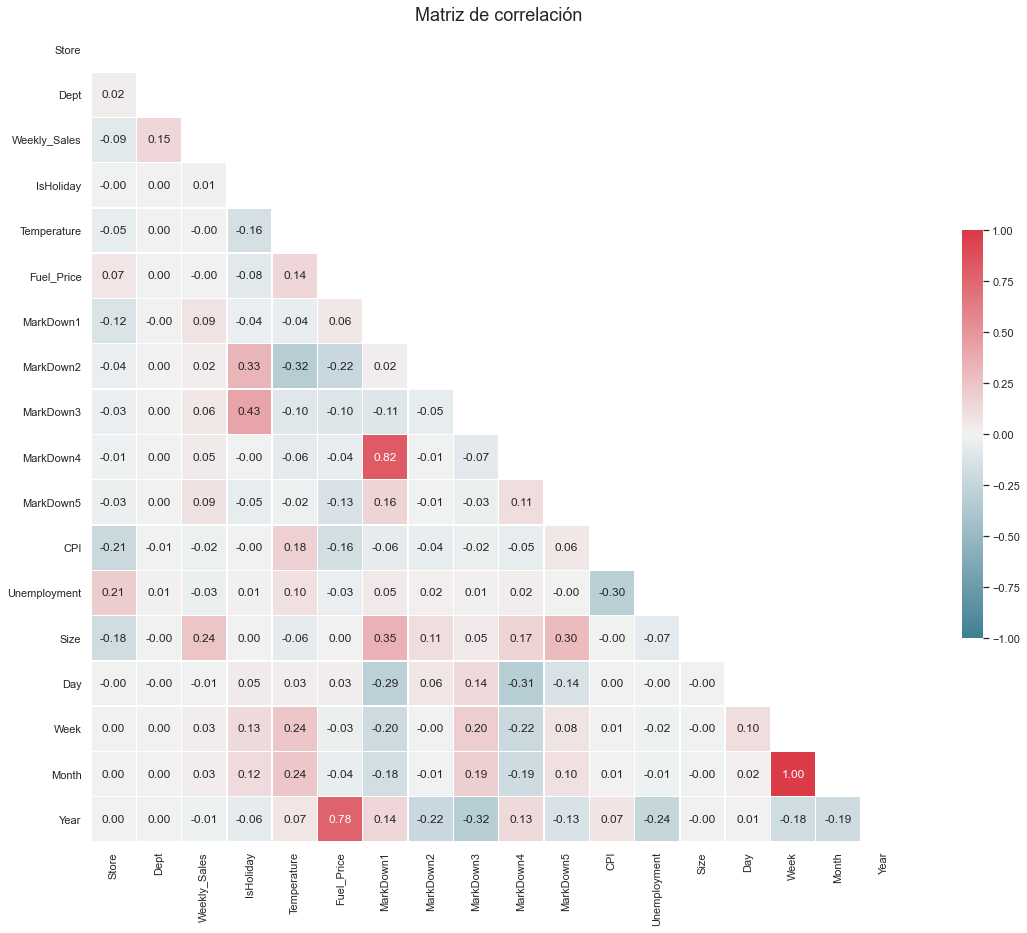

In [72]:
import numpy as np

sns.set(style="white")

corr = train_df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Matriz de correlación', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f')

plt.show()

# 4. Machine Learning


Realizaremos predicciones con los siguientes metodos:

- Linear Regression-------------------------------------- Kaggle Score : 19,651
- GradientBoostingRegressor--------------------------Kaggle Score : 10,038
- XGBRegressor-------------------------------------------Kaggle Score : 5,545
- RandomForestRegressor de serie -----------------Kaggle Score : 3,693
- RandomForestRegressor tunned 1 ----------------Kaggle Score : 3,569
- RandomForestRegressor tunned 2 ----------------Kaggle Score : 3,613
- RandomForestRegressor tunned 3 ----------------Kaggle Score : 3,594
- RandomForestRegressor + GridSearchCV-------Kaggle Score : 12,985
- TPOTRegressor -----------------------------------------Kaggle Score : 16,455

# 5. Anexo

In [80]:
!pip install pingouin
import pingouin as pg

## 5.1 Correlaciones

### 5.1.1 Correlaciones entre promedio de ventas mensuales y formatos

In [84]:
print("Correlacion del promedio de ventas mensuales de los formatos A y B")
display(pg.corr(train_df['Type']=='A', train_df['Type']=='B', method='pearson'))
print("--------------------------------------------------------")

print("Correlacion del promedio de ventas mensuales de los formatos A y C")
display(pg.corr(train_df['Type']=='A', train_df['Type']=='C', method='pearson'))
print("--------------------------------------------------------")
print("Correlacion del promedio de ventas mensuales de los formatos B y C")
display(pg.corr(train_df['Type']=='B', train_df['Type']=='C', method='pearson'))

Correlacion del promedio de ventas mensuales de los formatos A y B


,n,r,CI95%,p-val,BF10,power
pearson,421570,-0.813861,"[-0.81, -0.81]",0.0,inf,1.0


--------------------------------------------------------
Correlacion del promedio de ventas mensuales de los formatos A y C


,n,r,CI95%,p-val,BF10,power
pearson,421570,-0.342812,"[-0.35, -0.34]",0.0,inf,1.0


--------------------------------------------------------
Correlacion del promedio de ventas mensuales de los formatos B y C


,n,r,CI95%,p-val,BF10,power
pearson,421570,-0.266848,"[-0.27, -0.26]",0.0,inf,1.0


### 5.1.2 Correlacion entre Markdow1 y las cinco primeras semanas del año

In [85]:
df_weeks_Markdown1 = df_weeks.iloc[[0,1,2,3,4]]
print("Correlacion entre Markdow1 y las cinco primeras semanas del año")
display(pg.corr(df_weeks_Markdown1['Weekly_Sales'], df_weeks_Markdown1['MarkDown1'], method='pearson'))

Correlacion entre Markdow1 y las cinco primeras semanas del anno


,n,r,CI95%,p-val,BF10,power
pearson,5,0.999226,"[0.99, 1.0]",0.000026,72.366,0.999927


### 5.1.3 Correlacion entre las semanas de promocion Markdown2 y las ventas semanales

In [87]:
df_weeks_Markdown2 = df_weeks.iloc[[0,1,2,3,4,5,6,7,8,13,44,51]]
print("Correlacion entre las semanas de promocion Markdown2 y las ventas semanales")
display(pg.corr(df_weeks_Markdown2['Weekly_Sales'], df_weeks_Markdown2['MarkDown2'], method='pearson'))

Correlacion entre las semanas de promocion Markdown2 y las ventas semanales


,n,r,CI95%,p-val,BF10,power
pearson,12,-0.442863,"[-0.81, 0.18]",0.149355,0.907,0.31534


### 5.1.4 Correlacion entre las semanas de promocion Markdown3 y las ventas semanales

In [88]:
df_weeks_Markdown3 = df_weeks.iloc[[45,46,47]]
print("Correlacion entre las semanas de promocion Markdown3 y las ventas semanales ")
display(pg.corr(df_weeks_Markdown3['Weekly_Sales'], df_weeks_Markdown3['MarkDown3'], method='pearson'))

Correlacion entre las semanas de promocion Markdown3 y las ventas semanales 


,n,r,CI95%,p-val,BF10,power
pearson,3,0.992206,"[-1.0, 1.0]",0.079532,1.663,NaN


### 5.1.5 Correlacion entre las semanas de promocion Markdown4 y las ventas semanales

In [89]:
df_weeks_Markdown4 = df_weeks.iloc[[0,1,2,3,4,8,30]]
print("Correlacion entre las semanas de promocion Markdown4 y las ventas semanales ")
display(pg.corr(df_weeks_Markdown4['Weekly_Sales'], df_weeks_Markdown4['MarkDown4'], method='pearson'))

Correlacion entre las semanas de promocion Markdown4 y las ventas semanales 


,n,r,CI95%,p-val,BF10,power
pearson,7,0.822068,"[0.18, 0.97]",0.023248,3.895,0.690314


### 5.1.6 Correlacion entre las semanas de promocion 46,47 y 48 Markdown5 y las ventas semanales

In [90]:
df_weeks_Markdown5 = df_weeks.iloc[[45,46,47]]
print("Correlacion entre las semanas de promocion 46,47 y 48 Markdown5 y las ventas semanales ")
display(pg.corr(df_weeks_Markdown5['Weekly_Sales'], df_weeks_Markdown5['MarkDown5'], method='pearson'))

Correlacion entre las semanas de promocion 46,47 y 48 Markdown5 y las ventas semanales 


,n,r,CI95%,p-val,BF10,power
pearson,3,-0.539441,"[-1.0, 1.0]",0.637271,0.76,NaN


### 5.1.7 Correlación de las diferentes variables vs Ventas Semanales
Las variables que más importancia tienen en las ventas semanales son la superficie de venta de la tienda, el departamento y las diferentes rebajas.

El formato de tienda, el desempleo y el IPC parecen afectar negativamente de forma leve en las ventas cuando estas variables incrementan su valor.

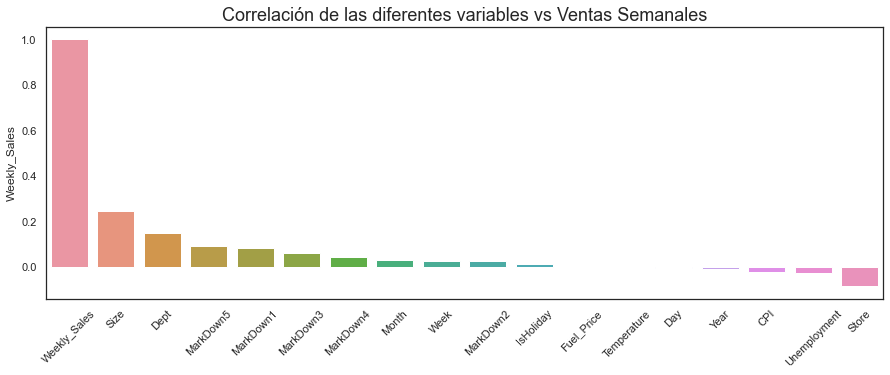

In [94]:
weekly_sales_corr = train_df.corr().iloc[2,:]

corr_df = pd.DataFrame(data = weekly_sales_corr, 
                       index = weekly_sales_corr.index ).sort_values(by = 'Weekly_Sales', ascending = False)
plt.figure(figsize = (15,5))
sns.set_palette('mako')
plt.xticks(rotation = 45)
plt.title('Correlación de las diferentes variables vs Ventas Semanales',fontsize=18)
sns.barplot (data = corr_df, x = corr_df.index, y = 'Weekly_Sales');

## 5.2 Ventas vs IPC / Por formato de tienda
El IPC no parece ser un factor determinante que afecte a las ventas semanales. 

Text(0.5, 1.0, 'Ventas vs IPC / Por formato de tienda')

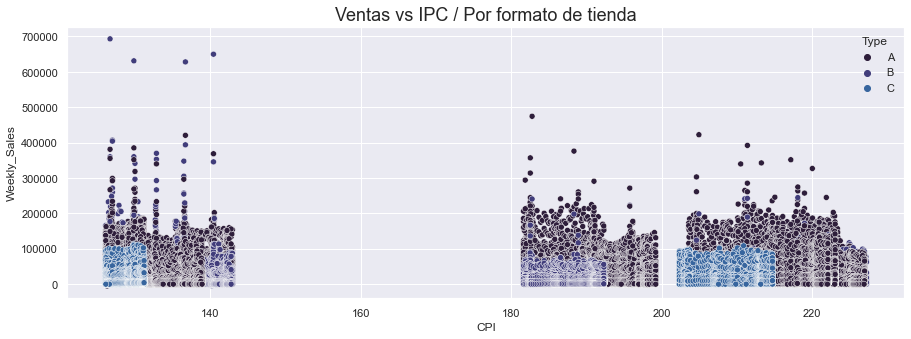

In [95]:
plt.figure (figsize = (15,5))
sns.set_style('darkgrid')
sns.scatterplot ( data = train_df, x = 'CPI', y =  'Weekly_Sales', hue = 'Type');
plt.title("Ventas vs IPC / Por formato de tienda", fontsize=18)

## 5.3 Algoritmos de Machine Learning

Empezaremos por eliminar de los dataset data_train y data_test las siguientes variables :

'MarkdownsSum', 'Week', 'Quarter', 'IsHoliday' y 'Date'

In [96]:
data_train.drop(['MarkdownsSum', 'Week','Quarter','IsHoliday','Date'], axis = 'columns', inplace=True)
data_test.drop(['MarkdownsSum', 'Week','Quarter','IsHoliday','Date'], axis = 'columns', inplace=True)

In [97]:

X = data_train[['Store', 'Dept','Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek',
       'LaborDay', 'Thanksgiving', 'Christmas']]

y = data_train['Weekly_Sales']

Utilizaremos train_test_split y dividiremos el conjunto en 70% training y el 30% en test.

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 5.1 LinearRegression

Regresión lineal por mínimos cuadrados ordinarios.

LinearRegression se ajusta a un modelo lineal con coeficientes w = (w1,…, wp) para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal.

###### Kaggle Score : 19,651

In [99]:
from sklearn import metrics

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Creamos modelo de Regresion Lineal
lrModel = lr.fit(X_train, y_train) 

# Prediccion para Train
preds_train_LR = lrModel.predict(X_train) 
# Prediccion para Test
preds_test_LR = lrModel.predict(X_test) 

print('R2 medio para Train es : ',metrics.mean_squared_error(y_train, preds_train_LR, squared = False)) # Obtenemos el R2 medio para Train
print('R2 medio para Test es : ',metrics.mean_squared_error(y_test, preds_test_LR , squared = False)) #Obtenemos el R2 medio para Test



R2 medio para Train es :  21725.671142760566
R2 medio para Test es :  21596.832059236225


In [100]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]

predict_LR = lrModel.predict(test)

In [101]:
sampleSubmission['Weekly_Sales'] = predict_LR
sampleSubmission.to_csv('submission_LR.csv',index=False)

In [102]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,13025.887240
1,1_1_2012-11-09,13355.303577
2,1_1_2012-11-16,12843.882252
3,1_1_2012-11-23,21148.302520
4,1_1_2012-11-30,12631.796530


### 5.2 GradientBoostingRegressor

GB construye un modelo aditivo de manera progresiva por etapas; permite la optimización de funciones de pérdida diferenciables arbitrarias. En cada etapa se ajusta un árbol de regresión al gradiente negativo de la función de pérdida dada.

##### Kaggle Score : 10,038


In [103]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)

# Creamos modelo Gradient Boosting Regressor
gbModel = gb.fit(X_train, y_train)

# Prediccion para Train
preds_train_GBR = gbModel.predict(X_train)
# Prediccion para Test
preds_test_GBR = gbModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ',metrics.mean_squared_error(y_train, preds_train_GBR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ',metrics.mean_squared_error(y_test, preds_test_GBR, squared = False))

R2 medio para Train es :  11330.162706962914
R2 medio para Test es :  11490.643150780385


In [104]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_GBR = gb.predict(test)

In [105]:
sampleSubmission['Weekly_Sales'] = predict_GBR
sampleSubmission.to_csv('submission_GBR.csv',index=False)

In [106]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,25164.011644
1,1_1_2012-11-09,25164.011644
2,1_1_2012-11-16,25164.011644
3,1_1_2012-11-23,33881.128199
4,1_1_2012-11-30,32150.119484


### 5.3 XGBRegressor

XGBoost significa "Extreme Gradient Boosting" y es una implementación del algoritmo de árboles de aumento de gradiente. XGBoost es un popular modelo de aprendizaje automático supervisado con características como velocidad de cálculo, paralelización y rendimiento.

##### Kaggle Score : 5,545

In [107]:
from xgboost import XGBRegressor
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Creamos modelo Gradient Boosting Regressor
gbmModel = gbm.fit(X_train, y_train)

# Prediccion para Train
preds_train_XGB = gbmModel.predict(X_train)
# Prediccion para Test
preds_test_XGB = gbmModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ',metrics.mean_squared_error(y_train, preds_train_XGB, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ',metrics.mean_squared_error(y_test, preds_test_XGB, squared = False))

R2 medio para Train es :  5059.2374223576335
R2 medio para Test es :  5511.471827305204


In [108]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_XGB = gbm.predict(test)

In [109]:
sampleSubmission['Weekly_Sales'] = predict_XGB
sampleSubmission.to_csv('submission_XGB.csv',index=False)

In [110]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,25924.121094
1,1_1_2012-11-09,25691.181641
2,1_1_2012-11-16,25713.083984
3,1_1_2012-11-23,20232.806641
4,1_1_2012-11-30,33072.839844


### 5.4 RandomForestRegressor

Un RandomForestRegressor es un metaestimador que se ajusta a una serie de árboles de decisión de clasificación en varias submuestras del conjunto de datos y utiliza promedios para mejorar la precisión predictiva y controlar el sobreajuste. El tamaño de la submuestra se controla con el parámetro max_samples si bootstrap = True (predeterminado); de lo contrario, se usa todo el conjunto de datos para construir cada árbol.

 - n_estimatorsint, default=100
 - criterion{“mse”, “mae”}, default=”mse”
 - max_depth: int, default=None
 - min_samples_split: int or float, default=2
 - min_samples_leaf: int or float, default=1
 - min_weight_fraction_leaf: float, default=0.0
 - max_features: {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
 - max_leaf_nodes: int, default=None
 - min_impurity_decrease: float, default=0.0
 - min_impurity_split: float, default=None
 - bootstrap: bool, default=True
 - oob_score: bool, default=False
 - n_jobs: int, default=None

#### 5.4.1 RandomForestRegressor parametros de serie
##### Kaggle Score : 3,693

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

#Creamos modelo  Random Forest Regressor
rfModel = rf.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 medio para Train es :  1370.2900375415418
R2 medio para Test es :  3622.5511996481423


In [113]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFR = rf.predict(test)

In [114]:
sampleSubmission['Weekly_Sales'] = predict_RFR
sampleSubmission.to_csv('submission_RFR.csv',index=False)

In [115]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,30944.0261
1,1_1_2012-11-09,24782.3429
2,1_1_2012-11-16,23319.0477
3,1_1_2012-11-23,26854.9215
4,1_1_2012-11-30,28684.0400


#### 5.4.2 RandomForestRegressor con bootstrap = False

Vamos a cambiar el parametro de bootstrap a False, con esto conseguiremos utilizar todas las variables en cada arbol.
Se comprueba que da mal resultado pues existe overfitting en Train con un R2 medio muy bajo pero en Test es mas impreciso que en la version original.

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=None,random_state=42,bootstrap=False)

#Creamos modelo  Random Forest Regressor
rfModel = rf.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 medio para Train es :  3.892924158469759e-11
R2 medio para Test es :  4791.1795612699425


#### 5.4.3 RandomForestRegressor con max_depth = 30
 Probamos limitando la profundidad del arbol por si de esta manera evitamos que se produzca un sobreajuste.
 
Se ha probado con diferentes ajustes pero con valores de 15 o 20 se ha comprobado que el R2 en Train y Test empeora notablemente.
Se observa una muy leve mejora pero es un punto de partida para ir cambiando otros parametros

In [117]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=30, random_state=42)

#Creamos modelo  Random Forest Regressor
rfModel = rf.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 medio para Train es :  1367.5162479206203
R2 medio para Test es :  3624.7776279143627
Wall time: 3min 26s


#### 5.4.4 RandomForestRegressor con max_depth = 30 + max features = 4,6,10,15

Vamos a limitar el numero de variables en cada split para comprobar si de esa manera conseguimos una mejora en el modelo anterior.

Con un numero de 4,6, y 10 hemos empeorado el modelo, por tanto ponemos el limite en 15.

In [118]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=30, random_state=42,max_features=15)

#Creamos modelo  Random Forest Regressor
rfModel = rf.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 medio para Train es :  1384.308691954954
R2 medio para Test es :  3727.953010536695
Wall time: 2min 36s


#### 5.4.5 RandomForestRegressor con max_depth = 30 + max features = 15, n_jobs = -1

Conseguimos una mejora en tiempo de respuesta, al obtener resultados en 23 segundos frente a los 4 minutos de la version inicial.
No obstante los resultados del modelo en Train y Test no varian frente a la version anterior

In [119]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=30, random_state=42,max_features=15,n_jobs=-1 )

#Creamos modelo  Random Forest Regressor
rfModel = rf.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 medio para Train es :  1384.308691954954
R2 medio para Test es :  3727.953010536695
Wall time: 23.2 s


#### 5.4.6 RandomForestRegressor con max_depth = 30 + max features = 15, n_jobs = -1, n_estimators = 80

Limitando el numero de arboles a 80 obtenemos una ligera mejora. Por debajo de 80 y por encima de este valor hemos obtenido resultados peores.

Hemos conseguido una leve mejora en la prediccion frente a la version sin modificar parametros.

#### Kaggle Score :3,569

In [120]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80 ,max_depth=30, random_state=42,max_features=15,n_jobs=-1)

#Creamos modelo  Random Forest Regressor
rfModel = rf.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 medio para Train es :  1388.6023502115268
R2 medio para Test es :  3735.6335867114453
Wall time: 21 s


In [121]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFR_Tunned = rf.predict(test)

In [122]:
sampleSubmission['Weekly_Sales'] = predict_RFR_Tunned
sampleSubmission.to_csv('submission_RFR_Tunned.csv',index=False)

#### 5.4.7 RandomForestRegressor con max_depth = 30 + max features = 15, n_jobs = -1, n_estimators = 80, min_samples_split = 4

limitamos aun mas las capacidades de cada arbol, en este caso el numero minimo de ejemplos requeridos para que se expanda un nodo y cree ramas pasara de 2 a 4. No se ha encontrado un empeoramiento significativo por lo que lo mantendremos de esta manera.

Finalmente comprobamos la prediccion en Kaggle y observamos que empeora por lo que este cambio no ha sido beneficioso.

#### Kaggle Score: 3,613

In [123]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80 ,min_samples_split = 4, max_depth=30, random_state=42,max_features=15,n_jobs=-1)

#Creamos modelo  Random Forest Regressor
rfModel = rf.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 medio para Train es :  1699.8486175235316
R2 medio para Test es :  3786.3679704137135
Wall time: 21.1 s


In [124]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFR_Tunned2 = rf.predict(test)

In [125]:
sampleSubmission['Weekly_Sales'] = predict_RFR_Tunned2
sampleSubmission.to_csv('submission_RFR_Tunned2.csv',index=False)

#### 5.4.8 RandomForestRegressor con max_depth = 30 + max features = 15, n_jobs = -1, n_estimators = 80, , min_samples_leaf= 2

Por ultimo, ajustaremos el algoritmo para que el numero minimo de muestras necesarias para estar en un nodo de hoja pase de 1 a 2.

Se comprueba que perjudica a Train pero no tanto a Test y nos podria dar una pista que nos indica que evita el sobreajuste.

Finalmente comprobamos que esta opcion tampoco mejora el modelo.

#### Kaggle Score: 3,594

In [126]:
%%time

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80,min_samples_leaf= 2, max_depth=30, random_state=42,max_features=15,n_jobs=-1)

#Creamos modelo  Random Forest Regressor
rfModel = rf.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFR = rfModel.predict(X_train)
# Prediccion para Test
preds_test_RFR = rfModel.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFR, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFR, squared = False))

R2 medio para Train es :  1982.7443145972788
R2 medio para Test es :  3845.817946043013
Wall time: 19.9 s


In [127]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFR_Tunned3 = rf.predict(test)

In [128]:
sampleSubmission['Weekly_Sales'] = predict_RFR_Tunned3
sampleSubmission.to_csv('submission_RFR_Tunned3.csv',index=False)

### 5.5 RandomForestRegressor + GridSearchCV 

Se consigue una mejora predictiva ajustando los siguientes parametros al modelo:

-  'bootstrap': True,
-  'max_depth': 100,
-  'max_features': 3,
-  'min_samples_leaf': 4,
-  'min_samples_split': 12,
-  'n_estimators': 10



##### Kaggle Score : 12,985

Importamos GridSearchCV y ajustamos los parametros que queremos calcular

In [131]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 100, 200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = 3, verbose = 2)

In [132]:
%%time
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits
Wall time: 37min 27s


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=3,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [10, 100, 200]},
             verbose=2)

In [133]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [134]:
RFRGridSearch = RandomForestRegressor(bootstrap = True, max_depth=100, max_features=3,min_samples_leaf=4, min_samples_split=12, n_estimators=10)

In [135]:
%%time
RFRGridSearch.fit(X_train, y_train)

# Prediccion para Train
preds_train_RFRGridSearch = RFRGridSearch.predict(X_train)
# Prediccion para Test
preds_test_RFRGridSearch = RFRGridSearch.predict(X_test)

# Obtenemos el R2 medio para Train
print('R2 medio para Train es : ', metrics.mean_squared_error(y_train, preds_train_RFRGridSearch, squared = False))
# Obtenemos el R2 medio para Test
print('R2 medio para Test es : ', metrics.mean_squared_error(y_test, preds_test_RFRGridSearch, squared = False))

R2 medio para Train es :  12433.802413523972
R2 medio para Test es :  14466.80810627869
Wall time: 3.32 s


In [136]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_RFRGridSearch = RFRGridSearch.predict(test)

In [137]:
sampleSubmission['Weekly_Sales'] = predict_RFRGridSearch
sampleSubmission.to_csv('submission_RFRGridSearch.csv',index=False)

In [138]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,28914.601004
1,1_1_2012-11-09,28912.343348
2,1_1_2012-11-16,27925.740514
3,1_1_2012-11-23,28789.467125
4,1_1_2012-11-30,33238.885459


### 5.6 TPOTRegressor

Kaggle Score : 16,455

In [139]:
from tpot import TPOTRegressor

In [140]:
enable_tpot = True

In [141]:
# TPOT takes 10hours to get a good parameters estimation.
if enable_tpot:
    X_tpot_train, X_tpot_test, y_tpot_train, y_tpot_test = train_test_split(X_train,  y_train, train_size=0.75, test_size=0.25, random_state=42)
    tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
    tpot.fit(X_tpot_train, y_tpot_train)
    print(tpot.score(X_tpot_test, y_tpot_test))
    tpot.export('tpot_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -24098959.03458171

Generation 2 - Current best internal CV score: -23814795.167898994

Generation 3 - Current best internal CV score: -20438831.965604078

Generation 4 - Current best internal CV score: -20424110.88753871

Generation 5 - Current best internal CV score: -20424110.88753871

Best pipeline: ExtraTreesRegressor(RobustScaler(input_matrix), bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
-17345212.180974178


In [142]:
from sklearn.ensemble import ExtraTreesRegressor

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = ExtraTreesRegressor(n_estimators=100,min_samples_leaf=6,max_features=1,min_samples_split=3)
model.fit(X, y)
preds = model.predict(X)
rmse_all = np.sqrt(mean_squared_error(y, preds))
print("RMSE: %f" % (rmse_all))

RMSE: 17784.954465


In [145]:
test = data_test[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type',
       'Size', 'Day', 'Month', 'Year', 'SuperBowlWeek', 'LaborDay',
       'Thanksgiving', 'Christmas']]
predict_TPOT = model.predict(test)

In [146]:
predict_TPOT = model.predict(test)

In [147]:
sampleSubmission['Weekly_Sales'] = predict_TPOT
sampleSubmission.to_csv('submission_TPOT.csv',index=False)